# Make Supplemental Figure 1

This notebook graphs the cis effect of EGFR copy number and phosphoproteomics. It graphs sites Y1197, Y1172, Y1110, Y1092, Y1069, Y1016, Y869 if there is enough data available [cite].

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import cptac
import cptac.utils as u
import plot_utils as p
import cptac.pancan as pc

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def print_stats(df1, x_axis, y_axis):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        print("Correlation: " + str(corr))
        print("P_value:" + str(pval))
        
    else: 
        return "Not Enough Data"
   

In [4]:
import cptac.pancan as pc 
#cptac version
cptac.version()   


'0.9.1'

In [78]:
g.list_sources_data()

,Data type,Available sources
0,CNV,washu
1,acetylproteomics,pdc
2,cancer_diagnosis,mssm
3,circular_RNA,bcm
4,clinical,"mssm, pdc"
5,deconvolution_cibersort,washu
6,deconvolution_xcell,washu
7,demographic,mssm
8,followup,mssm
9,mature_miRNA,washu


In [5]:
g = pc.PancanGbm()
hn = pc.PancanHnscc()
l = pc.PancanLuad()
#o = pc.PancanOv()
c = pc.PancanCcrcc()
#col = pc.PancanCoad()
b = pc.PancanBrca()
ls = pc.PancanLscc()
en = pc.PancanUcec()

In [9]:
def rename_duplicate_cols(df):
    cols = pd.Series(df.columns[:])

    for dup in cols[cols.duplicated()].unique(): 
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]

    # rename the columns with the cols list.
    df.columns=cols
    return df

# Step 1 Create Data Frame

For each cancer type create a df that combines proteomics and CNV. Then merge clinical dataframe and filter df to only have tumor samples. 

# Step 2  Call Plotting Function

# GBM

In [40]:
pd.set_option('display.max_columns', None)
phospho_CNV_Tumor = g.join_omics_to_omics(df1_name="phosphoproteomics", df1_source = "umich",df2_name="CNV", df2_source = "washu",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")

drop = ["Peptide", "Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor,levels_to_drop= drop,  flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("umich_phosphoproteomics_", "")
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("washu_", "")
phospho_CNV_Tumor = rename_duplicate_cols(phospho_CNV_Tumor)
EGFR_sites= phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())
phospho_CNV_Tumor

['EGFR_Y1069', 'EGFR_Y1092', 'EGFR_Y1069Y1092', 'EGFR_Y1069T1085Y1092', 'EGFR_Y1110', 'EGFR_Y1125', 'EGFR_Y1138', 'EGFR_Y1125S1153', 'EGFR_Y1172', 'EGFR_Y1197', 'EGFR_Y998']


Name,EGFR_S1025,EGFR_S1026,EGFR_S1030,EGFR_S1026S1030,EGFR_S1037,EGFR_S1039,EGFR_S1042,EGFR_S1045,EGFR_T1041,EGFR_S1037S1039,EGFR_S1037S1042,EGFR_S1039S1042,EGFR_S1039T1041,EGFR_S1042S1045,EGFR_T1041S1042,EGFR_S1039T1041S1042,EGFR_S1037_1,EGFR_S1039_1,EGFR_S1042_1,EGFR_T1041S1042_1,EGFR_S1039T1041S1042_1,EGFR_S1064,EGFR_S1042S1064,EGFR_S1064_1,EGFR_S1064_2,EGFR_S1070,EGFR_S1081T1085,EGFR_S1071,EGFR_S1081,EGFR_S1096,EGFR_Y1069,EGFR_Y1092,EGFR_S1071S1081,EGFR_S1071T1085,EGFR_S1071Y1092,EGFR_S1081Y1092,EGFR_T1078S1081,EGFR_Y1069Y1092,EGFR_Y1069T1085Y1092,EGFR_S1104,EGFR_Y1110,EGFR_S1153,EGFR_T1145,EGFR_Y1125,EGFR_Y1138,EGFR_Y1125S1153,EGFR_S1166,EGFR_Y1172,EGFR_S1162S1166,EGFR_S1166Y1172,EGFR_S1190,EGFR_T1191,EGFR_Y1197,EGFR_S1204,EGFR_S151S177,EGFR_S315,EGFR_S695,EGFR_T693,EGFR_T693S695,EGFR_S991,EGFR_S995,EGFR_Y998,EGFR_S991S995,EGFR_S991Y998,EGFR_CNV
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C3L-00104,NaN,0.113433,NaN,NaN,NaN,-0.130386,NaN,NaN,-0.598480,NaN,0.302819,NaN,-0.731105,0.052253,NaN,NaN,NaN,NaN,-0.086827,NaN,-0.158572,NaN,NaN,-1.517009,-1.912243,NaN,NaN,-0.139259,NaN,0.761052,0.409615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630805,NaN,NaN,NaN,0.730235,NaN,-0.768830,-0.109267,-0.429774,0.654220,NaN,NaN,0.817643,-0.232939,NaN,-0.525511,-0.286190,0.270161,0.049010,-0.535963,0.597272,0.163113,-0.174362,NaN,0.93370
C3L-00365,NaN,1.698343,NaN,NaN,-0.103146,0.814556,1.138589,1.767554,NaN,NaN,NaN,NaN,NaN,0.434681,0.741992,NaN,NaN,NaN,-0.030084,NaN,NaN,-1.382186,NaN,-0.128703,-0.767480,NaN,NaN,2.266058,0.975655,NaN,1.496133,NaN,3.144013,2.186849,NaN,NaN,NaN,3.412232,NaN,-0.171306,1.340297,NaN,NaN,NaN,NaN,NaN,0.518699,1.978513,NaN,2.449148,NaN,NaN,NaN,0.070145,NaN,-1.784629,1.309958,0.835120,-0.176292,0.337299,0.511753,NaN,0.474516,NaN,4.05715
C3L-00674,NaN,-1.083998,-2.026384,0.163931,-0.398840,-0.021799,0.311941,NaN,NaN,0.951415,NaN,-0.917906,NaN,0.808203,NaN,NaN,NaN,0.160087,-0.078518,NaN,NaN,NaN,0.681725,-0.311272,-0.786584,NaN,NaN,-1.971349,NaN,-0.044384,NaN,-0.678918,NaN,-0.396448,NaN,-1.650339,-0.195253,-0.210285,NaN,-1.417991,0.718457,NaN,-1.738501,0.011977,NaN,-1.166564,-0.835602,-1.523181,NaN,-0.547017,1.045541,-0.963732,-0.172903,0.956432,NaN,-1.610170,-0.523772,0.191742,-1.230896,0.033936,0.384323,NaN,0.199745,-0.111047,3.55977
C3L-00677,NaN,-0.346184,NaN,NaN,-1.638016,-0.495744,-2.059668,-1.031517,NaN,NaN,NaN,-0.848910,NaN,-0.030743,NaN,NaN,NaN,NaN,-2.666101,NaN,NaN,-2.875353,NaN,-2.314292,-2.353987,NaN,NaN,-2.079225,-2.541217,-0.836634,NaN,-3.477927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.206384,0.639344,NaN,-1.097800,NaN,NaN,NaN,-2.289120,NaN,NaN,-2.705241,NaN,NaN,-3.714113,-0.421988,NaN,-1.260963,-0.999969,-0.753896,-0.622735,-0.980434,-0.743383,NaN,0.004636,NaN,0.51424
C3L-01040,NaN,-0.178903,NaN,NaN,NaN,-0.530826,NaN,NaN,-0.235662,NaN,-0.011367,NaN,-0.705321,-0.776213,NaN,NaN,NaN,NaN,-1.439645,NaN,-0.813709,NaN,NaN,-2.230088,-2.645044,NaN,NaN,-1.509756,NaN,0.079104,-1.699682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104712,NaN,NaN,NaN,-0.272163,NaN,-1.015577,-0.492915,-0.285203,-1.705817,NaN,NaN,-2.415220,-0.364335,NaN,-0.761732,-0.914146,0.602420,-0.204610,-0.653839,0.557460,-0.114073,-0.620228,NaN,0.39940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03183,0.163090,NaN,NaN,NaN,0.140291,0.155773,-0.991319,NaN,NaN,NaN,NaN,-0.105584,NaN,-0.629379,NaN,NaN,NaN,NaN,-0.853894,-0.998253,NaN,-3.652882,NaN,-1.355689,-1.797863,NaN,NaN,-0.205281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.566899,NaN,NaN,NaN,-0.252041,-2.888583,NaN,-1.768632,NaN,NaN,-3.489669,NaN,0.176924,-1.460530,-1.073110,-0.634863,NaN,-0.686400,NaN,NaN,-1.197512,NaN,1.75925
C3N-03184,NaN,-0.143651,NaN,NaN,0.181220,0.335113,NaN,0.313656,NaN,NaN,NaN,0.451839,-0.194595,-0.095303,NaN,NaN,-0.764612,-0.7

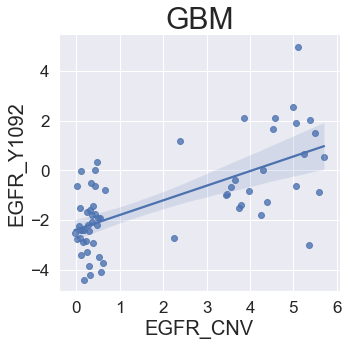

Correlation: 0.6537085055554521
P_value:8.389823985329528e-09


In [16]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1092", hue = "none", title = "GBM", ra_stats = False ,show_plot = True, save_file_name = "png_files/Sup_Fig1_Gbm_Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092")

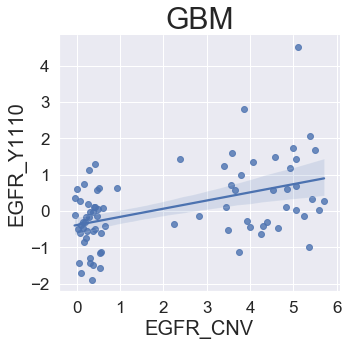

Correlation: 0.44983974934376214
P_value:3.597959096082536e-05


In [17]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1110", hue = "none", title = "GBM", ra_stats = False ,show_plot = True, save_file_name = "png_files/Sup_Fig1_Gbm_Y1110")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1110")

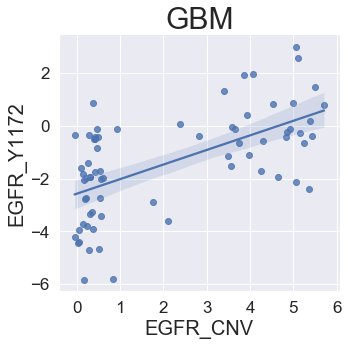

Correlation: 0.595746634136489
P_value:5.3135270590091735e-08


In [18]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1172", hue = "none", title = "GBM", ra_stats = False ,show_plot = True, save_file_name = "png_files/Sup_Fig1_GBM_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

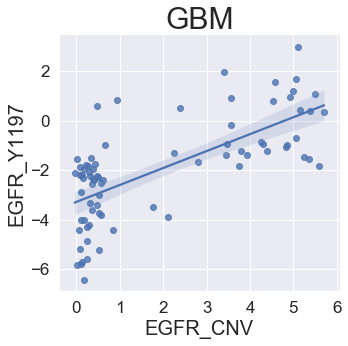

Correlation: 0.6883203051656541
P_value:4.599792188386643e-12


In [19]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1197", hue = "none", title = "GBM", ra_stats = False ,show_plot = True, save_file_name = "png_files/Sup_Fig1_GBM_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

In [20]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y998", hue = "none", title = "GBM", ra_stats = False ,show_plot = True,save_file_name = "png_files/Sup_Fig1_GBM_Y998")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y998")

'Not Enough Data'

In [24]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1138", hue = "none", title = "GBM", ra_stats = False ,show_plot = True,save_file_name = "png_files/Sup_Fig1_GBM_Y1138")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1138")

'Not Enough Data'

In [25]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1069", hue = "none", title = "GBM", ra_stats = False ,show_plot = True,save_file_name = "png_files/Sup_Fig1_GBM_Y1069")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1069")

'Not Enough Data'

In [26]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1069Y1092", hue = "none", title = "GBM", ra_stats = False ,show_plot = True,save_file_name = "png_files/Sup_Fig1_GBM_Y1069Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1069Y1092")

'Not Enough Data'

In [27]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1069T1085Y1092", hue = "none", title = "GBM", ra_stats = False ,show_plot = True,save_file_name = "png_files/Sup_Fig1_GBM_Y1069T1085Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1069T1085Y1092")

'Not Enough Data'

In [29]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1138", hue = "none", title = "GBM", ra_stats = False ,show_plot = True,save_file_name = "png_files/Sup_Fig1_GBM_Y1138")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1138")

'Not Enough Data'

In [30]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1125S1153", hue = "none", title = "GBM", ra_stats = False ,show_plot = True,save_file_name = "png_files/Sup_Fig1_GBM_Y1125S1153")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1125S1153")

'Not Enough Data'

In [41]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1125")

'Not Enough Data'

# Kidney 

In [45]:
phospho_CNV_Tumor = c.join_omics_to_omics(df1_name="phosphoproteomics", df1_source = "umich",df2_name="CNV", df2_source = "washu",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("umich_phosphoproteomics_", "")
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("washu_", "")

EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1016', 'EGFR_Y1092', 'EGFR_Y1172', 'EGFR_Y1197']


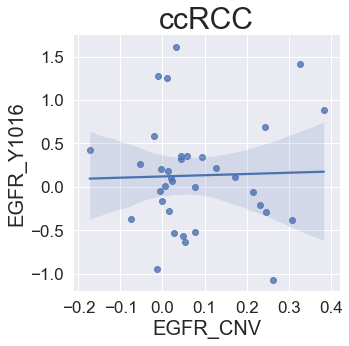

Correlation: 0.028303573793527353
P_value:0.8717806091624457


In [49]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1016",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1016")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1016")

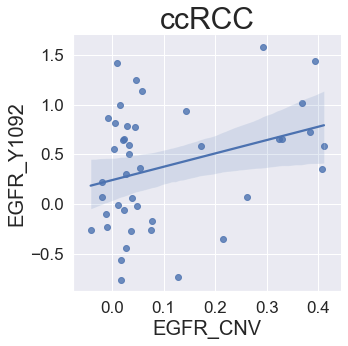

Correlation: 0.3135721540566006
P_value:0.04059902306063802


In [50]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092")

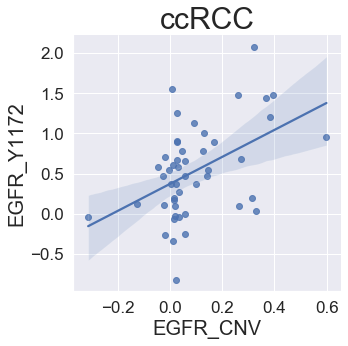

Correlation: 0.4623700358322617
P_value:0.0009375446053159108


In [52]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

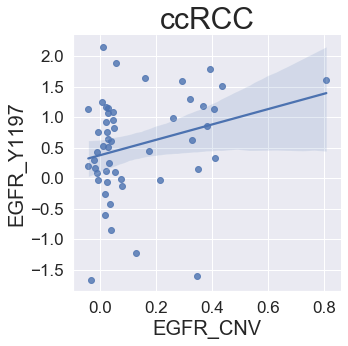

Correlation: 0.26659832949972084
P_value:0.058614074886081356


In [54]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

# Ovarian 

In [ ]:
'''
phospho_CNV_Tumor = Ovar.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide", "Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())
''''''

In [ ]:
#p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172", hue = "none", ra_stats = False,title = "OV", show_plot = True, save_file_name = "png_files/Sup_Fig1_Ovarian_Y1172")
#print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

In [ ]:
#print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y869")

In [ ]:
#print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

# Colon

In [ ]:
'''
phospho_CNV_Tumor = colon.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")

EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())
'''

In [ ]:
#p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092",hue = "none", ra_stats = False, title = "CO", show_plot = True, save_file_name = "png_files/Sup_Fig1_Colon_Y1092")
#print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092")

In [ ]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

In [ ]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

# Brca 

In [57]:
phospho_CNV_Tumor = b.join_omics_to_omics(df1_name="phosphoproteomics", df1_source = "umich",df2_name="CNV", df2_source = "washu",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")

drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("umich_phosphoproteomics_", "")
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("washu_", "")
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1016', 'EGFR_Y1172', 'EGFR_Y1197']


In [58]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1016",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1016")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1016")

'Not Enough Data'

In [59]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

'Not Enough Data'

In [60]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

'Not Enough Data'

# LUAD

In [61]:
phospho_CNV_Tumor = b.join_omics_to_omics(df1_name="phosphoproteomics", df1_source = "umich",df2_name="CNV", df2_source = "washu",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("umich_phosphoproteomics_", "")
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("washu_", "")
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1016', 'EGFR_Y1172', 'EGFR_Y1197']


In [62]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172", hue = 'none', title = "LUAD", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Luad_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

'Not Enough Data'

In [63]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197", hue = 'none', title = "LUAD", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Luad_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

'Not Enough Data'

In [65]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1016", hue = 'none', title = "LUAD", ra_stats = False,save_file_name = "png_files/Sup_Fig1_Luad_Y1016")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1016")

'Not Enough Data'

# HNSCC

In [67]:
phospho_CNV_Tumor = hn.join_omics_to_omics(df1_name="phosphoproteomics", df1_source = "umich",df2_name="CNV", df2_source = "washu",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")

drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("umich_phosphoproteomics_", "")
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("washu_", "")
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1092', 'EGFR_Y1110', 'EGFR_Y1172', 'EGFR_Y1197']


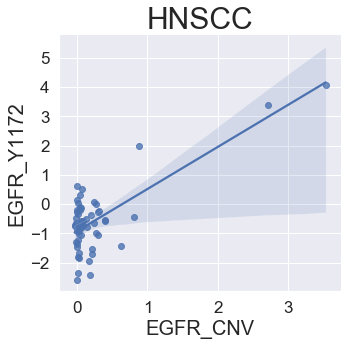

Correlation: 0.7451848028237937
P_value:4.500495694781808e-11


In [68]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Hnscc_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

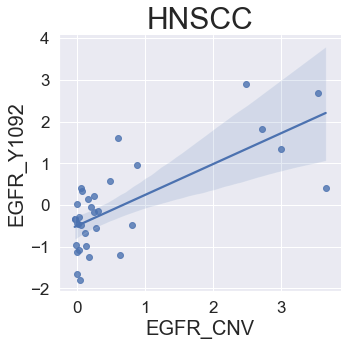

Correlation: 0.7176896183640304
P_value:2.5886614549436976e-06


In [69]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Hnscc_Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092")

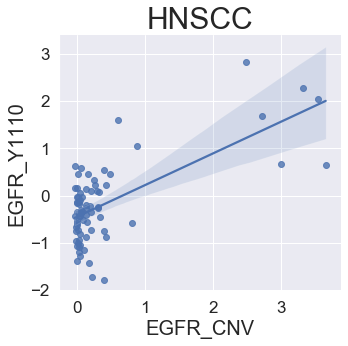

Correlation: 0.6634992218644296
P_value:1.1777779562075847e-10


In [70]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1110", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Hnscc_Y1110")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1110")

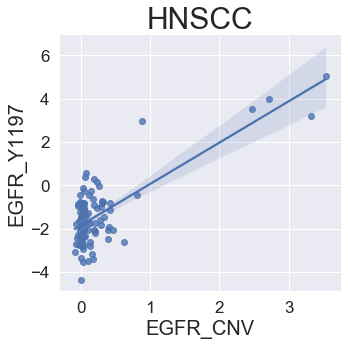

Correlation: 0.7578137821204929
P_value:8.159957121100043e-21


In [71]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Hnscc_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

# LSCC

In [73]:
phospho_CNV_Tumor = hn.join_omics_to_omics(df1_name="phosphoproteomics", df1_source = "umich",df2_name="CNV", df2_source = "washu",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("umich_phosphoproteomics_", "")
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("washu_", "")
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1092', 'EGFR_Y1110', 'EGFR_Y1172', 'EGFR_Y1197']


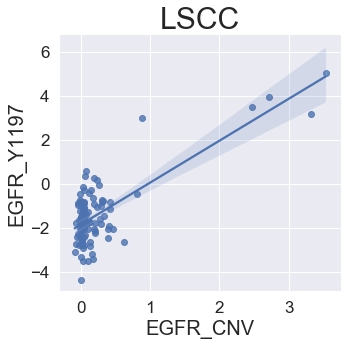

Correlation: 0.7578137821204929
P_value:8.159957121100043e-21


In [74]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Lscc_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

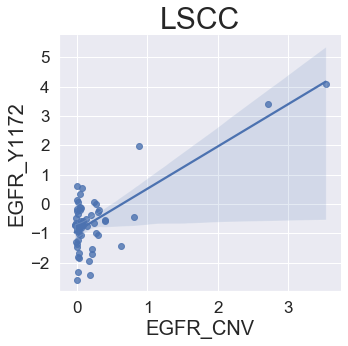

Correlation: 0.7451848028237937
P_value:4.500495694781808e-11


In [75]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Lscc_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

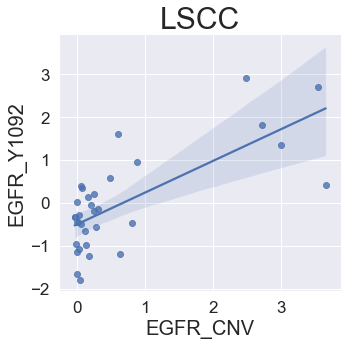

Correlation: 0.7176896183640304
P_value:2.5886614549436976e-06


In [76]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Lscc_Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092")

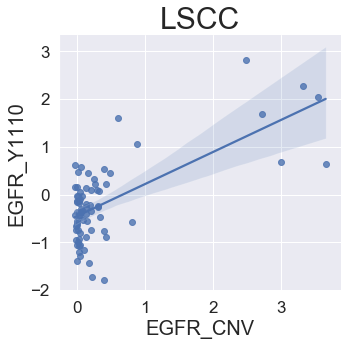

Correlation: 0.6634992218644296
P_value:1.1777779562075847e-10


In [77]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1110", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Lscc_Y1110")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1110")